In [1]:
import numpy as np
import cv2
import os
from tensorflow.python.keras.utils import to_categorical
from matplotlib import pyplot as plt
from os import listdir
from keras.preprocessing.image import load_img, img_to_array

/Users/akipin/opt/anaconda3/envs/dls-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akipin/opt/anaconda3/envs/dls-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akipin/opt/anaconda3/envs/dls-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akipin/opt/anaconda3/envs/d

In [2]:
fileB = [filename for filename in listdir('/Users/akipin/opt/CleanDB500500/broken') if not filename.startswith('.')]
fileN = [filename for filename in listdir('/Users/akipin/opt/CleanDB500500/normal') if not filename.startswith('.')]

In [3]:
pelvisB = np.zeros((len(fileB), 256, 256, 3))
pelvisN = np.zeros((len(fileN), 256, 256, 3))

In [4]:
for i in range(0, len(fileB)):
    fnameform = '/Users/akipin/opt/DataBase500500/broken/%s' %fileB[i]
    pelvisB[i] = np.array(img_to_array(load_img(fnameform, target_size=(256, 256))))/255.0

In [5]:
for i in range(0, len(fileN)):
    fnameform = '/Users/akipin/opt/DataBase500500/normal/%s' %fileN[i]
    pelvisN[i] = np.array(img_to_array(load_img(fnameform, target_size=(256, 256))))/255.0

In [6]:
print(pelvisB.shape)
print(pelvisN.shape)

(445, 256, 256, 3)
(537, 256, 256, 3)


In [7]:
pelvisimg_train = np.concatenate((pelvisB, pelvisN), axis=0)

In [8]:
from tensorflow.python.keras.utils import to_categorical

pelvislabelB = np.full((len(fileB), 1), 0, dtype="uint8")
pelvislabelN = np.full((len(fileN), 1), 1, dtype="uint8")

pelvislabel_train = np.concatenate((pelvislabelB, pelvislabelN), axis=0)
pelvisonehotlabel_train = to_categorical(pelvislabel_train, 2)

imageclassification = ["Broken", "Normal"]

In [9]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dense

model = Sequential()

model.add(
        Conv2D(
                filters = 32,
                input_shape = (256, 256, 3),
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(
        Conv2D(
                filters = 32,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(
        Conv2D(
                filters = 64,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(
        Conv2D(
                filters = 64,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(
        Conv2D(
                filters = 128,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(
        Conv2D(
                filters = 128,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

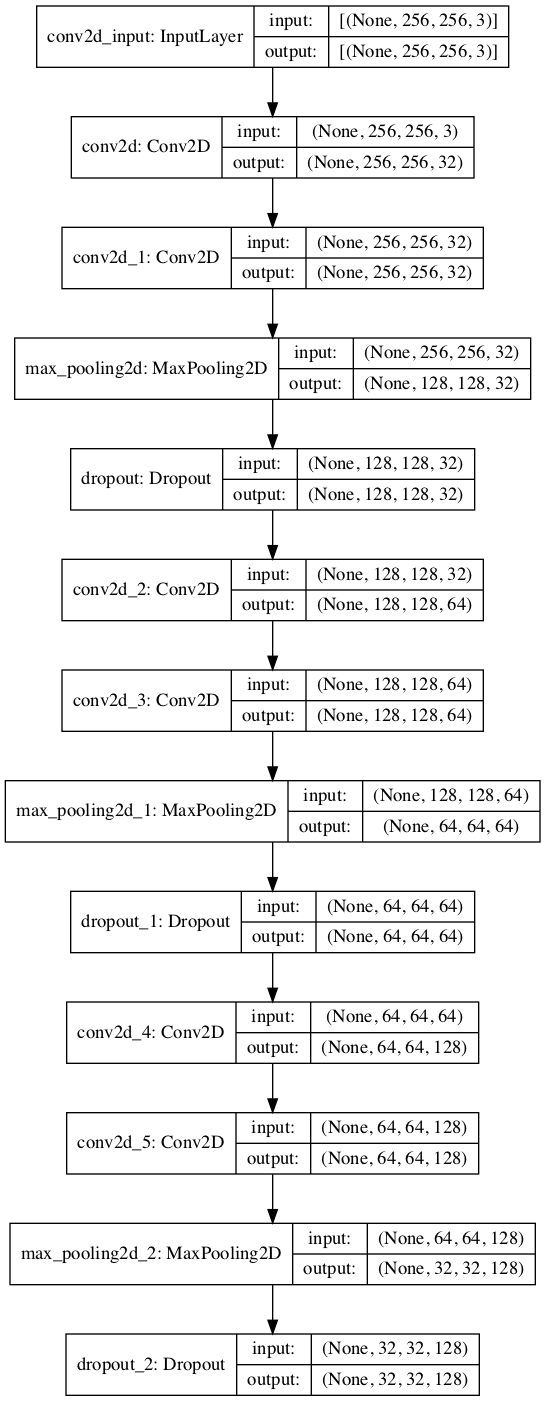

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
)

In [18]:
model.add(Flatten())

model.add(Dense(units=512, activation ='relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 2, activation='softmax'))

In [19]:
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

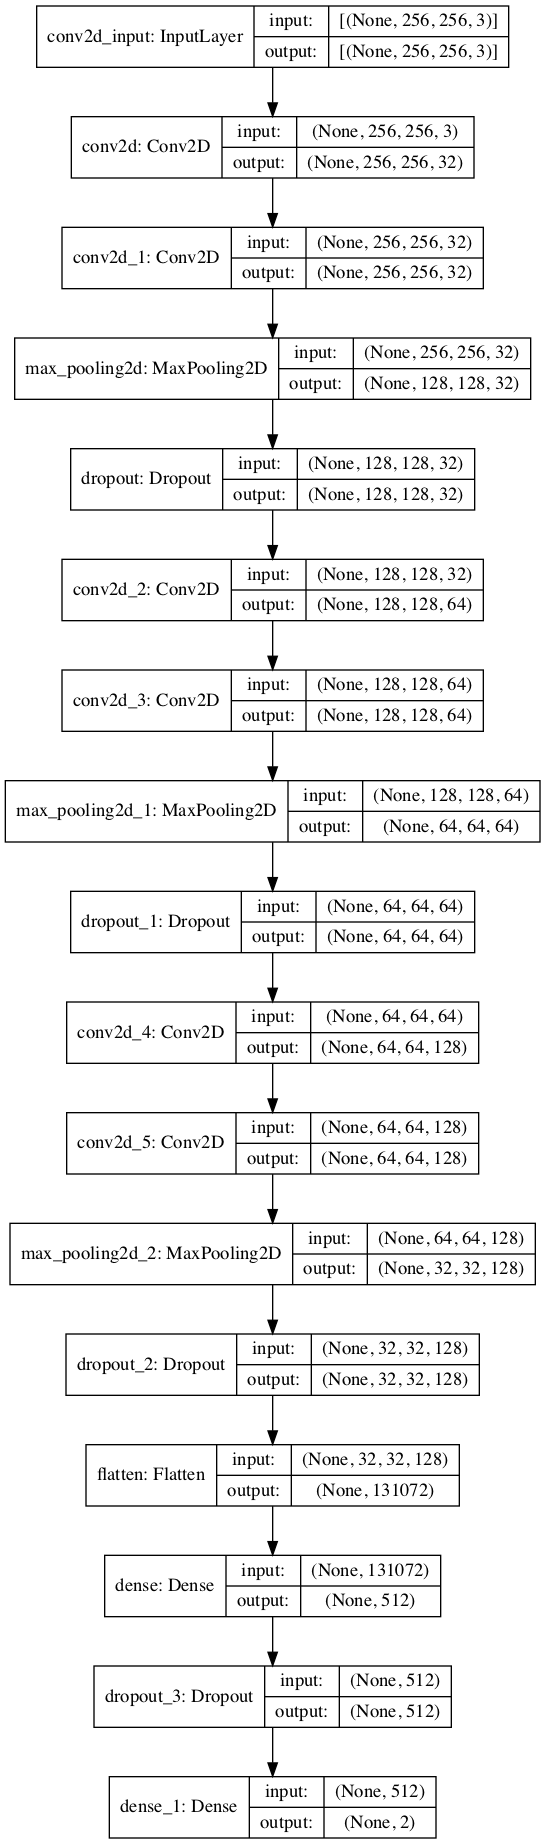

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
)

In [22]:
model_history = model.fit(
    pelvisimg_train,
    pelvisonehotlabel_train,
    batch_size = 64,
    epochs = 50,
    validation_split = 0.2
)

Train on 785 samples, validate on 197 samples
Epoch 1/50
785/785 [==============================] - 82s 104ms/sample - loss: 1.1015 - acc: 0.5108 - val_loss: 0.7648 - val_acc: 0.0000e+00
Epoch 2/50
785/785 [==============================] - 82s 105ms/sample - loss: 0.6915 - acc: 0.5618 - val_loss: 0.7115 - val_acc: 0.0000e+00
Epoch 3/50
785/785 [==============================] - 87s 111ms/sample - loss: 0.6903 - acc: 0.5669 - val_loss: 0.7308 - val_acc: 0.0000e+00
Epoch 4/50
785/785 [==============================] - 81s 104ms/sample - loss: 0.6882 - acc: 0.5669 - val_loss: 0.8509 - val_acc: 0.0000e+00
Epoch 5/50
785/785 [==============================] - 80s 102ms/sample - loss: 0.6846 - acc: 0.5669 - val_loss: 0.7932 - val_acc: 0.0000e+00
Epoch 6/50
785/785 [==============================] - 79s 101ms/sample - loss: 0.6870 - acc: 0.5669 - val_loss: 0.7842 - val_acc: 0.0000e+00
Epoch 7/50
785/785 [==============================] - 80s 101ms/sample - loss: 0.6864 - acc: 0.5669 - val_lo

In [23]:
probs = model.predict(pelvisimg_train)
probs.shape

(982, 2)

In [24]:
probs

array([[1.0000000e+00, 7.6579509e-21],
       [1.0000000e+00, 7.6354395e-19],
       [1.0000000e+00, 4.2570398e-15],
       ...,
       [2.9198440e-02, 9.7080159e-01],
       [7.8001112e-02, 9.2199892e-01],
       [2.0397840e-04, 9.9979609e-01]], dtype=float32)

In [25]:
import numpy as np

In [26]:
labelnum = 2
conmat = np.zeros((labelnum, labelnum))

In [27]:
for case in range(0, len(probs)):
    maxprob = probs[case, 0]
    maxprobloc = 0
    maxlabelloc = 0
    
    for i in range(0, labelnum):
        if(maxprob < probs[case, i]):
            maxprob = probs[case, i]
            maxprobloc = i
        
        if(pelvisonehotlabel_train[case, i] == 1):
            maxlabelloc = i
        
    conmat[maxlabelloc, maxprobloc] += 1

In [28]:
print(conmat)

[[444.   1.]
 [ 35. 502.]]


In [29]:
for cor in range(0, labelnum):
    for loc in range(0, labelnum):
        print('{:>6}'.format(int(conmat[cor, loc])), end="")
        
    print('\n')

   444     1

    35   502



In [30]:
sum = 0.0
diag = 0.0

for cor in range(0, labelnum):
    for loc in range(0, labelnum):
         sum += conmat[cor, loc]
            
for i in range(0, labelnum):
    diag += conmat[i, i]

print('Accuracy = ', diag/sum)

Accuracy =  0.9633401221995926


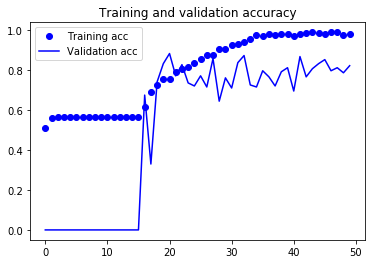

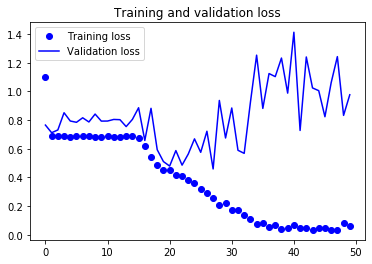

In [31]:
import matplotlib.pyplot as plt

acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()